In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
data_frame = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data_frame['GRE Score'] = data_frame['GRE Score'] / data_frame['GRE Score'].max()
data_frame['TOEFL Score'] = data_frame['TOEFL Score'] / data_frame['TOEFL Score'].max()
data_frame['University Rating'] = data_frame['University Rating'] / data_frame['University Rating'].max()
data_frame['SOP'] = data_frame['SOP'] / data_frame['SOP'].max()
data_frame['LOR '] = data_frame['LOR '] / data_frame['LOR '].max()
data_frame['CGPA'] = data_frame['CGPA'] / data_frame['CGPA'].max()

In [4]:
mediaChance = data_frame['Chance of Admit '].mean()

data_frame[(data_frame[['Chance of Admit ']] >= mediaChance)] = 1
data_frame[(data_frame[['Chance of Admit ']] < mediaChance)] = 0

data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.991176,0.983333,0.8,0.9,0.9,0.972782,1,1.0
1,2,0.952941,0.891667,0.8,0.8,0.9,0.894153,1,1.0
2,3,0.929412,0.866667,0.6,0.6,0.7,0.806452,1,0.0
3,4,0.947059,0.916667,0.6,0.7,0.5,0.873992,1,1.0
4,5,0.923529,0.858333,0.4,0.4,0.6,0.827621,0,0.0


In [5]:
x = data_frame.drop(['Serial No.', 'Research', 'Chance of Admit '], axis=1)[['GRE Score', 'TOEFL Score', 'CGPA','SOP', 'LOR ','University Rating']]
y = data_frame['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation="sigmoid"))
model.add(Dense(130, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 255)               1785      
_________________________________________________________________
dense_2 (Dense)              (None, 130)               33280     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 262       
Total params: 35,327
Trainable params: 35,327
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("[INFO] treinando a rede neural...")
model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy", metrics=["accuracy"])
train = model.fit(x=x_train, y=y_train, batch_size=128, epochs=1000, verbose=2, validation_data=(x_test, y_test))

[INFO] treinando a rede neural...
Train on 375 samples, validate on 125 samples
Epoch 1/1000
 - 0s - loss: 0.7103 - acc: 0.4880 - val_loss: 0.6883 - val_acc: 0.5520
Epoch 2/1000
 - 0s - loss: 0.6975 - acc: 0.4880 - val_loss: 0.6908 - val_acc: 0.5520
Epoch 3/1000
 - 0s - loss: 0.6957 - acc: 0.4587 - val_loss: 0.6927 - val_acc: 0.5520
Epoch 4/1000
 - 0s - loss: 0.6938 - acc: 0.5147 - val_loss: 0.6950 - val_acc: 0.4480
Epoch 5/1000
 - 0s - loss: 0.6938 - acc: 0.5120 - val_loss: 0.6958 - val_acc: 0.4480
Epoch 6/1000
 - 0s - loss: 0.6935 - acc: 0.5120 - val_loss: 0.6963 - val_acc: 0.4480
Epoch 7/1000
 - 0s - loss: 0.6942 - acc: 0.4320 - val_loss: 0.6979 - val_acc: 0.4480
Epoch 8/1000
 - 0s - loss: 0.6932 - acc: 0.5120 - val_loss: 0.6968 - val_acc: 0.4480
Epoch 9/1000
 - 0s - loss: 0.6954 - acc: 0.5120 - val_loss: 0.6954 - val_acc: 0.4480
Epoch 10/1000
 - 0s - loss: 0.6931 - acc: 0.5120 - val_loss: 0.6960 - val_acc: 0.4480
Epoch 11/1000
 - 0s - loss: 0.6941 - acc: 0.4613 - val_loss: 0.6966 -

Epoch 96/1000
 - 0s - loss: 0.6933 - acc: 0.5120 - val_loss: 0.6936 - val_acc: 0.4480
Epoch 97/1000
 - 0s - loss: 0.6918 - acc: 0.5120 - val_loss: 0.6940 - val_acc: 0.4480
Epoch 98/1000
 - 0s - loss: 0.6919 - acc: 0.5120 - val_loss: 0.6941 - val_acc: 0.4480
Epoch 99/1000
 - 0s - loss: 0.6921 - acc: 0.5120 - val_loss: 0.6937 - val_acc: 0.4480
Epoch 100/1000
 - 0s - loss: 0.6919 - acc: 0.5120 - val_loss: 0.6950 - val_acc: 0.4480
Epoch 101/1000
 - 0s - loss: 0.6926 - acc: 0.5120 - val_loss: 0.6952 - val_acc: 0.4480
Epoch 102/1000
 - 0s - loss: 0.6926 - acc: 0.5120 - val_loss: 0.6940 - val_acc: 0.4480
Epoch 103/1000
 - 0s - loss: 0.6917 - acc: 0.5120 - val_loss: 0.6941 - val_acc: 0.4480
Epoch 104/1000
 - 0s - loss: 0.6917 - acc: 0.5120 - val_loss: 0.6947 - val_acc: 0.4480
Epoch 105/1000
 - 0s - loss: 0.6918 - acc: 0.5120 - val_loss: 0.6944 - val_acc: 0.4480
Epoch 106/1000
 - 0s - loss: 0.6923 - acc: 0.5120 - val_loss: 0.6936 - val_acc: 0.4480
Epoch 107/1000
 - 0s - loss: 0.6930 - acc: 0.51

Epoch 191/1000
 - 0s - loss: 0.6923 - acc: 0.5120 - val_loss: 0.6926 - val_acc: 0.4480
Epoch 192/1000
 - 0s - loss: 0.6914 - acc: 0.5547 - val_loss: 0.6932 - val_acc: 0.4480
Epoch 193/1000
 - 0s - loss: 0.6914 - acc: 0.4800 - val_loss: 0.6946 - val_acc: 0.4480
Epoch 194/1000
 - 0s - loss: 0.6913 - acc: 0.5120 - val_loss: 0.6930 - val_acc: 0.4480
Epoch 195/1000
 - 0s - loss: 0.6917 - acc: 0.4507 - val_loss: 0.6946 - val_acc: 0.4480
Epoch 196/1000
 - 0s - loss: 0.6905 - acc: 0.5120 - val_loss: 0.6947 - val_acc: 0.4480
Epoch 197/1000
 - 0s - loss: 0.6907 - acc: 0.5120 - val_loss: 0.6941 - val_acc: 0.4480
Epoch 198/1000
 - 0s - loss: 0.6905 - acc: 0.5120 - val_loss: 0.6934 - val_acc: 0.4480
Epoch 199/1000
 - 0s - loss: 0.6917 - acc: 0.5120 - val_loss: 0.6915 - val_acc: 0.4480
Epoch 200/1000
 - 0s - loss: 0.6903 - acc: 0.5813 - val_loss: 0.6927 - val_acc: 0.4480
Epoch 201/1000
 - 0s - loss: 0.6925 - acc: 0.5120 - val_loss: 0.6923 - val_acc: 0.4480
Epoch 202/1000
 - 0s - loss: 0.6910 - acc: 

Epoch 286/1000
 - 0s - loss: 0.6897 - acc: 0.5120 - val_loss: 0.6931 - val_acc: 0.4480
Epoch 287/1000
 - 0s - loss: 0.6893 - acc: 0.5173 - val_loss: 0.6934 - val_acc: 0.4480
Epoch 288/1000
 - 0s - loss: 0.6897 - acc: 0.5227 - val_loss: 0.6938 - val_acc: 0.4480
Epoch 289/1000
 - 0s - loss: 0.6889 - acc: 0.5120 - val_loss: 0.6921 - val_acc: 0.4480
Epoch 290/1000
 - 0s - loss: 0.6890 - acc: 0.5120 - val_loss: 0.6910 - val_acc: 0.4480
Epoch 291/1000
 - 0s - loss: 0.6890 - acc: 0.5120 - val_loss: 0.6904 - val_acc: 0.4560
Epoch 292/1000
 - 0s - loss: 0.6891 - acc: 0.5173 - val_loss: 0.6907 - val_acc: 0.4480
Epoch 293/1000
 - 0s - loss: 0.6887 - acc: 0.5253 - val_loss: 0.6914 - val_acc: 0.4480
Epoch 294/1000
 - 0s - loss: 0.6889 - acc: 0.5120 - val_loss: 0.6910 - val_acc: 0.4480
Epoch 295/1000
 - 0s - loss: 0.6886 - acc: 0.5120 - val_loss: 0.6915 - val_acc: 0.4480
Epoch 296/1000
 - 0s - loss: 0.6888 - acc: 0.5120 - val_loss: 0.6909 - val_acc: 0.4480
Epoch 297/1000
 - 0s - loss: 0.6894 - acc: 

 - 0s - loss: 0.6889 - acc: 0.5120 - val_loss: 0.6898 - val_acc: 0.4480
Epoch 381/1000
 - 0s - loss: 0.6885 - acc: 0.5520 - val_loss: 0.6897 - val_acc: 0.4480
Epoch 382/1000
 - 0s - loss: 0.6874 - acc: 0.5307 - val_loss: 0.6898 - val_acc: 0.4480
Epoch 383/1000
 - 0s - loss: 0.6880 - acc: 0.5120 - val_loss: 0.6886 - val_acc: 0.5120
Epoch 384/1000
 - 0s - loss: 0.6877 - acc: 0.5413 - val_loss: 0.6884 - val_acc: 0.5680
Epoch 385/1000
 - 0s - loss: 0.6874 - acc: 0.5440 - val_loss: 0.6885 - val_acc: 0.5280
Epoch 386/1000
 - 0s - loss: 0.6873 - acc: 0.6880 - val_loss: 0.6899 - val_acc: 0.4480
Epoch 387/1000
 - 0s - loss: 0.6871 - acc: 0.5120 - val_loss: 0.6900 - val_acc: 0.4480
Epoch 388/1000
 - 0s - loss: 0.6893 - acc: 0.5120 - val_loss: 0.6880 - val_acc: 0.6560
Epoch 389/1000
 - 0s - loss: 0.6877 - acc: 0.5920 - val_loss: 0.6882 - val_acc: 0.5760
Epoch 390/1000
 - 0s - loss: 0.6875 - acc: 0.5467 - val_loss: 0.6883 - val_acc: 0.5680
Epoch 391/1000
 - 0s - loss: 0.6883 - acc: 0.5413 - val_lo

Epoch 475/1000
 - 0s - loss: 0.6864 - acc: 0.5360 - val_loss: 0.6878 - val_acc: 0.4880
Epoch 476/1000
 - 0s - loss: 0.6856 - acc: 0.5413 - val_loss: 0.6880 - val_acc: 0.4800
Epoch 477/1000
 - 0s - loss: 0.6862 - acc: 0.5173 - val_loss: 0.6872 - val_acc: 0.5360
Epoch 478/1000
 - 0s - loss: 0.6857 - acc: 0.6133 - val_loss: 0.6881 - val_acc: 0.4800
Epoch 479/1000
 - 0s - loss: 0.6855 - acc: 0.5253 - val_loss: 0.6881 - val_acc: 0.4800
Epoch 480/1000
 - 0s - loss: 0.6856 - acc: 0.5973 - val_loss: 0.6887 - val_acc: 0.4560
Epoch 481/1000
 - 0s - loss: 0.6858 - acc: 0.5280 - val_loss: 0.6884 - val_acc: 0.4560
Epoch 482/1000
 - 0s - loss: 0.6855 - acc: 0.5573 - val_loss: 0.6888 - val_acc: 0.4480
Epoch 483/1000
 - 0s - loss: 0.6856 - acc: 0.5120 - val_loss: 0.6879 - val_acc: 0.4800
Epoch 484/1000
 - 0s - loss: 0.6855 - acc: 0.5333 - val_loss: 0.6877 - val_acc: 0.4880
Epoch 485/1000
 - 0s - loss: 0.6854 - acc: 0.5387 - val_loss: 0.6879 - val_acc: 0.4800
Epoch 486/1000
 - 0s - loss: 0.6860 - acc: 

Epoch 570/1000
 - 0s - loss: 0.6840 - acc: 0.5253 - val_loss: 0.6859 - val_acc: 0.5280
Epoch 571/1000
 - 0s - loss: 0.6838 - acc: 0.6080 - val_loss: 0.6864 - val_acc: 0.4880
Epoch 572/1000
 - 0s - loss: 0.6845 - acc: 0.5813 - val_loss: 0.6864 - val_acc: 0.4880
Epoch 573/1000
 - 0s - loss: 0.6840 - acc: 0.6373 - val_loss: 0.6871 - val_acc: 0.4800
Epoch 574/1000
 - 0s - loss: 0.6841 - acc: 0.5360 - val_loss: 0.6866 - val_acc: 0.4880
Epoch 575/1000
 - 0s - loss: 0.6843 - acc: 0.6720 - val_loss: 0.6876 - val_acc: 0.4560
Epoch 576/1000
 - 0s - loss: 0.6839 - acc: 0.5360 - val_loss: 0.6874 - val_acc: 0.4560
Epoch 577/1000
 - 0s - loss: 0.6839 - acc: 0.5653 - val_loss: 0.6876 - val_acc: 0.4560
Epoch 578/1000
 - 0s - loss: 0.6838 - acc: 0.5120 - val_loss: 0.6868 - val_acc: 0.4800
Epoch 579/1000
 - 0s - loss: 0.6848 - acc: 0.6000 - val_loss: 0.6872 - val_acc: 0.4640
Epoch 580/1000
 - 0s - loss: 0.6836 - acc: 0.5280 - val_loss: 0.6868 - val_acc: 0.4800
Epoch 581/1000
 - 0s - loss: 0.6843 - acc: 

 - 0s - loss: 0.6825 - acc: 0.5893 - val_loss: 0.6844 - val_acc: 0.5280
Epoch 665/1000
 - 0s - loss: 0.6823 - acc: 0.5813 - val_loss: 0.6843 - val_acc: 0.5440
Epoch 666/1000
 - 0s - loss: 0.6829 - acc: 0.6747 - val_loss: 0.6858 - val_acc: 0.4800
Epoch 667/1000
 - 0s - loss: 0.6829 - acc: 0.5413 - val_loss: 0.6846 - val_acc: 0.5120
Epoch 668/1000
 - 0s - loss: 0.6821 - acc: 0.6347 - val_loss: 0.6852 - val_acc: 0.4880
Epoch 669/1000
 - 0s - loss: 0.6822 - acc: 0.5893 - val_loss: 0.6851 - val_acc: 0.4880
Epoch 670/1000
 - 0s - loss: 0.6820 - acc: 0.5680 - val_loss: 0.6848 - val_acc: 0.5040
Epoch 671/1000
 - 0s - loss: 0.6821 - acc: 0.5360 - val_loss: 0.6840 - val_acc: 0.5680
Epoch 672/1000
 - 0s - loss: 0.6820 - acc: 0.7013 - val_loss: 0.6848 - val_acc: 0.5040
Epoch 673/1000
 - 0s - loss: 0.6819 - acc: 0.6133 - val_loss: 0.6851 - val_acc: 0.4880
Epoch 674/1000
 - 0s - loss: 0.6818 - acc: 0.5520 - val_loss: 0.6845 - val_acc: 0.5120
Epoch 675/1000
 - 0s - loss: 0.6832 - acc: 0.6133 - val_lo

Epoch 759/1000
 - 0s - loss: 0.6818 - acc: 0.6773 - val_loss: 0.6843 - val_acc: 0.4800
Epoch 760/1000
 - 0s - loss: 0.6801 - acc: 0.5813 - val_loss: 0.6839 - val_acc: 0.4880
Epoch 761/1000
 - 0s - loss: 0.6801 - acc: 0.5547 - val_loss: 0.6831 - val_acc: 0.5120
Epoch 762/1000
 - 0s - loss: 0.6814 - acc: 0.5920 - val_loss: 0.6822 - val_acc: 0.5840
Epoch 763/1000
 - 0s - loss: 0.6803 - acc: 0.7333 - val_loss: 0.6834 - val_acc: 0.5040
Epoch 764/1000
 - 0s - loss: 0.6811 - acc: 0.6427 - val_loss: 0.6844 - val_acc: 0.4800
Epoch 765/1000
 - 0s - loss: 0.6806 - acc: 0.5707 - val_loss: 0.6835 - val_acc: 0.4880
Epoch 766/1000
 - 0s - loss: 0.6800 - acc: 0.5920 - val_loss: 0.6832 - val_acc: 0.5120
Epoch 767/1000
 - 0s - loss: 0.6819 - acc: 0.5520 - val_loss: 0.6812 - val_acc: 0.7200
Epoch 768/1000
 - 0s - loss: 0.6801 - acc: 0.7467 - val_loss: 0.6826 - val_acc: 0.5520
Epoch 769/1000
 - 0s - loss: 0.6801 - acc: 0.6000 - val_loss: 0.6824 - val_acc: 0.5600
Epoch 770/1000
 - 0s - loss: 0.6798 - acc: 

 - 0s - loss: 0.6792 - acc: 0.6800 - val_loss: 0.6820 - val_acc: 0.5040
Epoch 854/1000
 - 0s - loss: 0.6787 - acc: 0.6960 - val_loss: 0.6827 - val_acc: 0.4800
Epoch 855/1000
 - 0s - loss: 0.6786 - acc: 0.5387 - val_loss: 0.6804 - val_acc: 0.5840
Epoch 856/1000
 - 0s - loss: 0.6778 - acc: 0.6693 - val_loss: 0.6805 - val_acc: 0.5760
Epoch 857/1000
 - 0s - loss: 0.6779 - acc: 0.6720 - val_loss: 0.6810 - val_acc: 0.5520
Epoch 858/1000
 - 0s - loss: 0.6782 - acc: 0.7067 - val_loss: 0.6816 - val_acc: 0.5120
Epoch 859/1000
 - 0s - loss: 0.6785 - acc: 0.5413 - val_loss: 0.6796 - val_acc: 0.6640
Epoch 860/1000
 - 0s - loss: 0.6788 - acc: 0.7413 - val_loss: 0.6816 - val_acc: 0.5120
Epoch 861/1000
 - 0s - loss: 0.6779 - acc: 0.6267 - val_loss: 0.6814 - val_acc: 0.5120
Epoch 862/1000
 - 0s - loss: 0.6781 - acc: 0.5867 - val_loss: 0.6806 - val_acc: 0.5680
Epoch 863/1000
 - 0s - loss: 0.6781 - acc: 0.7013 - val_loss: 0.6814 - val_acc: 0.5120
Epoch 864/1000
 - 0s - loss: 0.6781 - acc: 0.5493 - val_lo

Epoch 948/1000
 - 0s - loss: 0.6757 - acc: 0.5840 - val_loss: 0.6778 - val_acc: 0.6320
Epoch 949/1000
 - 0s - loss: 0.6759 - acc: 0.7200 - val_loss: 0.6785 - val_acc: 0.5920
Epoch 950/1000
 - 0s - loss: 0.6757 - acc: 0.7067 - val_loss: 0.6790 - val_acc: 0.5600
Epoch 951/1000
 - 0s - loss: 0.6756 - acc: 0.6187 - val_loss: 0.6780 - val_acc: 0.6080
Epoch 952/1000
 - 0s - loss: 0.6761 - acc: 0.7547 - val_loss: 0.6791 - val_acc: 0.5520
Epoch 953/1000
 - 0s - loss: 0.6770 - acc: 0.6213 - val_loss: 0.6780 - val_acc: 0.6080
Epoch 954/1000
 - 0s - loss: 0.6760 - acc: 0.7520 - val_loss: 0.6793 - val_acc: 0.5280
Epoch 955/1000
 - 0s - loss: 0.6760 - acc: 0.6853 - val_loss: 0.6798 - val_acc: 0.5120
Epoch 956/1000
 - 0s - loss: 0.6756 - acc: 0.6080 - val_loss: 0.6786 - val_acc: 0.5760
Epoch 957/1000
 - 0s - loss: 0.6755 - acc: 0.6800 - val_loss: 0.6787 - val_acc: 0.5600
Epoch 958/1000
 - 0s - loss: 0.6759 - acc: 0.5840 - val_loss: 0.6771 - val_acc: 0.6960
Epoch 959/1000
 - 0s - loss: 0.6758 - acc: 

In [10]:
print("[INFO] avaliando a rede neural...")
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

[INFO] avaliando a rede neural...
              precision    recall  f1-score   support

           0       0.97      0.41      0.57        69
           1       0.57      0.98      0.72        56

   micro avg       0.66      0.66      0.66       125
   macro avg       0.77      0.69      0.65       125
weighted avg       0.79      0.66      0.64       125



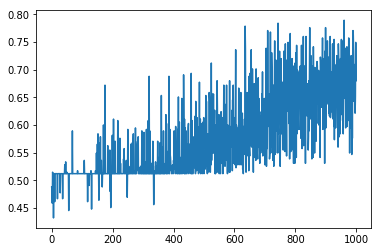

In [13]:
plt.plot(train.history['acc'])
plt.show()

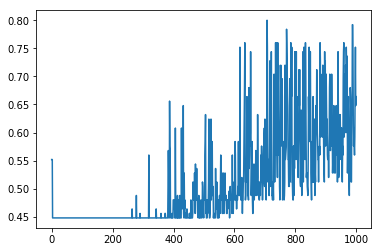

In [14]:
plt.plot(train.history['val_acc'])
plt.show()